In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

In [2]:
def plot_sphere(r=1, center=(0,0,0), plot_center=False, panels=False, alpha=0.3):
    """
    The plot of a sphere with radius r and center 'center'.
    r: float
        The radious of the sphere. Default 1.
    center: 3d array like
        The center of the sphere. Default (0,0,0).    
    plot_center: bool
        Set to True to plot the center of the sphere. Default False.
    panels: bool 
        Set to True to see the axis and panels containing the plot
        otherwise just plots the sphere. Default False.
    alpha: float [0-1]
        Opacity of the sphere. Default 0.3."""
    

    #Plot using spherical coordinates
    phi   = np.linspace(0, 2*np.pi, 100)
    theta = np.linspace(0, np.pi, 100)

    x = center[0] + r*np.outer(np.cos(phi), np.sin(theta))
    y = center[1] + r*np.outer(np.sin(phi), np.sin(theta))
    z = center[2] + r*np.outer(np.ones(np.size(phi)), np.cos(theta))

    ax = plt.axes(projection="3d")
    ax.plot_surface(x, y, z, alpha=alpha)
    if not panels: 
        ax.set_axis_off()
    else: 
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        
    if plot_center: ax.scatter(center[0], center[1], center[2])
    fig.tight_layout()

In [3]:
def generate_path(l, r, center=(0,0,0), seed=False, info=False):
    """
    The random drunkard's path with mean free path l.
    l: float
        The mean free path of the drunkard. It should
        be just a little fracction of the radious r.
    r: float
        The maximum distance that the drunkard can 'walk'
        from his start point (center).
    center: 3d array-like
        The point from were the drunkard starts to walk.
        Default value [0,0,0]
    seed: int/bool
        A seed for the generation of the random path.
        Defalult False.
    info: bool
        Whether we want to see the final distance reached 
        by the drunkard and the number of steps taken to
        reach that point or not. Default False.
    """

    xs = [center[0]]
    ys = [center[1]]
    zs = [center[2]]
    
    a = -1
    b =  1
    if seed: np.random.seed(seed)
        
    while (xs[-1]-center[0])**2 + (ys[-1]-center[1])**2 + (zs[-1]-center[2])**2 <= r**2:
        xs.append( xs[-1] + (a + (b - a)*np.random.rand())*l )
        ys.append( ys[-1] + (a + (b - a)*np.random.rand())*l )
        zs.append( zs[-1] + (a + (b - a)*np.random.rand())*l )
    
    if info:
        r_final = np.sqrt((xs[-1]-center[0])**2 + (ys[-1]-center[1])**2 + (zs[-1]-center[2])**2)
        print( f"The final radious is r_final = {r_final:.2f}" )
        print( f"Iterations: {len(xs)}")
    
    return xs, ys, zs

In [4]:
def plot_drunkards_path(path, r=1, center=(0,0,0), 
                        plot_center=False, plot_end=False, plot_sphere=True,
                        panels=False, alpha=0.2):
    """
    The plot of the drunkard's path within a sphere 
    with radius r and center in 'center'.
    path: array-like
        Array with the shape [[x0, x1,...], 
        [y0, y1,...], [z0, z1,...]] containing the path.
    r: float
        The radious of the sphere. Default 1.
    center: 3d array-like
        The center of the sphere and where the drunkard's
        starts to 'walk'. Default (0,0,0).    
    plot_center: bool
        Set to True to plot the center of the sphere. 
        Default False.
    panels: bool 
        Set to True to see the axis and panels containing
        the plot, otherwise just plots the sphere and the
        path. Default False.
    alpha: float [0-1]
        Opacity of the sphere. Default 0.3.
    """
    
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection="3d")
    
    #Sphere (boundary)
    #Plot using spherical coordinates
    phi   = np.linspace(0, 2*np.pi, 100)
    theta = np.linspace(0, np.pi, 100)

    x = center[0] + r*np.outer(np.cos(phi), np.sin(theta))
    y = center[1] + r*np.outer(np.sin(phi), np.sin(theta))
    z = center[2] + r*np.outer(np.ones(np.size(phi)), np.cos(theta))

    #Plots
    if plot_sphere: ax.plot_surface(x, y, z, alpha=alpha)
    if plot_center: ax.scatter(path[0][0],  path[1][0],  path[2][0],  
                               s=100, alpha=1, color="red", marker="*", label="Start")
    if plot_end:    ax.scatter(path[0][-1], path[1][-1], path[2][-1],
                               s=50,  alpha=1, color="red", marker="o", label="End")

    #Plotting the path
    r_max = np.sqrt( (path[0][0]-path[0][-1])**2 + (path[1][0]-path[1][-1])**2 + (path[2][0]-path[2][-1])**2)
    ax.scatter(path[0][1:-1], path[1][1:-1], path[2][1:-1], s=10, alpha=0.05, color="black", 
               label="$r = %.2f$\n$N_{i} = %.i$"%(r_max, len(path[0])) )
    
    #Customizing
    font_label = {'size': 8}
    font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 13}
    
    if not panels: 
        ax.set_axis_off()
    else: 
        ax.set_xlabel("X", fontdict=font_title)
        ax.set_ylabel("Y", fontdict=font_title)
        ax.set_zlabel("Z", fontdict=font_title)
    
    plt.legend(loc="lower center", prop=font_label, shadow=True, ncol=3)
    plt.title("The 3D Drunkard's path", fontdict=font_title)
    ax.view_init(10,10)
    fig.tight_layout()


In [5]:
r = 2
center = [1, 3, 6]
path = generate_path(l=0.02, r=r, center=center, info=True, seed=2357)

The final radious is r_final = 2.01
Iterations: 16803


<IPython.core.display.Javascript object>


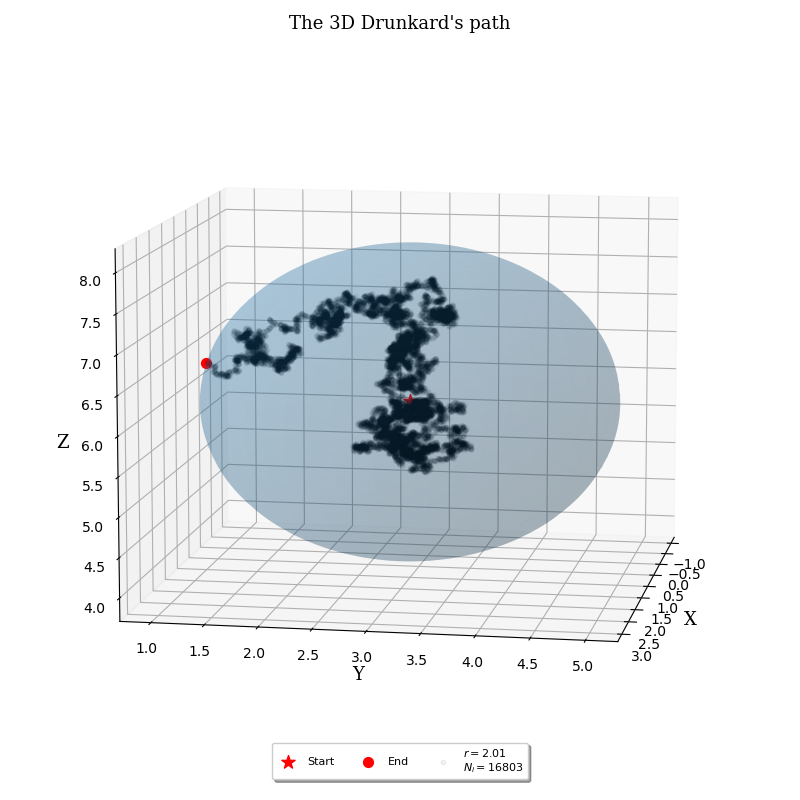

In [6]:
plot_drunkards_path(path=path, r=r, center=center, panels=True, plot_center=True, plot_end=True, plot_sphere=True)

In [32]:
%%capture
count  = 0
#frames = 200
frames = 50

for i in range(1, len(path[0])):
    current_path = [path[0][:i], path[1][:i], path[2][:i]]
    if i%(int(len(path[0])/frames))==0: 
        plot = plot_drunkards_path(path=current_path, r=r, center=center,
                                   panels=True, plot_center=True, plot_end=True)
        plt.savefig(f"./Drunkards_path/Frames/{count:05}")      
        count+=1
    
!convert -delay 13 -loop 0  Drunkards_path/Frames/*.png Drunkards_path/Frames/Drunkards_animated.gif
!rm Drunkards_path/Frames/*.png